# Lecture 4: Loss Functions and Regularization


Benedikt Auer, Paul Ludwig, Jannik Niebling 

In this notebook, you'll find various tasks encompassing both theoretical and coding exercises. Each exercise corresponds to a specific number of points, which are explicitly indicated within the task description.

Always use the Jupyter kernel associated with the dedicated environment when compiling the notebook and completing your exercises.

## Excercise 1 (Theory) (25/100)

### Regularization techniques

In the lecture you heard about different types of regularization techniques which help the training of a neural network (or a machine learning model in general) to generalize better.     
First, write down the formulae for the $L_1$ and $L_2$ type of regularization and for a given loss function $\mathcal{L}$ of a regression model write down its regularized version.
Then for each of those regularization techniques, elaborate on the following aspects:        
- **Task (1.a)** **(5 pts.)** What are the effect of $L_1$($L_2$) regularization on the model's weights $W$?
- **Task (1.b)** **(5 pts.)** How robust is $L_1$($L_2$) regularization with respect to outliers data?
- **Task (1.c)** **(5 pts.)** Which one of the two techniques is more computationally advantageous and why?
- **Task (1.d)** **(5 pts.)** Which one of the two techniques is more suited for feature selection?


> Hint: by *feature selection (extraction)* we mean the ability of selecting the most important and informative features from the available set of features. In many real-world datasets, there can be a large number of features, some of which may be irrelevant, redundant, or noisy. Including all features in the model which can induce fitting the *noise* in the training data rather than capturing the underlying patterns. Feature selection thus aims to mitigate this by selecting only the **most relevant** features, which can improve model performance, reduce complexity, and enhance interpretability.


- **Task (1.e)** **(5 pts.)** Based on what you have learned in the lecture and further readings you may have done, discuss why one type of regularization can be more performant than the other. Based on this, in which scenarios would you recommend using one over the other?


The diffrent regularization are given by
$$
\mathcal{L}_{\text{reg, }L_1} = \mathcal{L} + \lambda \sum_{i=1}^{n} |w_i|
$$
and
$$
\mathcal{L}_{\text{reg, }L_2} = \mathcal{L} + \lambda \sum_{i=1}^{n} w_i^2
$$

- Task (1.a): The $L_1$ regularization pushes most weights to zero.  This is due to the modulus of the weight. On the other hand the $L2$ regularization scales quadratic with the weight, leading to less penalization for small terms. Therfore the regularization encourages smaller weights, without forcing them to 0 ( for reasonable choices of $\lambda$).

- Task(1.b): The robustness against outliers follows directly from Task(1.a). Since $L_1$ pushes most weights to zero, it is robust against outliners. $L_2$ only enforces only small weights, so in principle outliniers are still a problem.

- Task(1.c)
$L_1$ is more advantagous for multiple reasons. First $L_1$ produces sparse tensor, which reduces the computational complexity by reducing the number of operations. Second the implementation of the modules can be realized using bitwise operations which are usually faster than floating point arithmetic (although this is probably neglactible).

- Task(1.d)
The $L_1$ regularization is more suited because it removes features completly by setting the associated weights to zero.

- Task(1.d)
The $L_1$ regularization is useful when the dataset has many redundent or irrelevant features, it can efficently eliminate them. Furthermore the $L_1$ regularization is useful when teh DataSet is noisy or have features which count as outliner features. The $L_2$ regularization is useful when the dataset consists of many features, which have roughly the same contribution. A nother realavent point is that the convergence while training should be higher for $L_2$ regularization. From a pure performance standpoint the $L_1$ regularization seems as the better bet. In most cases, however, it depends on the exact task.

> #### Your solution here

## Excercise 2 (Theory) (10/100)

### Neural Network Generalization

To enable a neural network to generalize effectively with limited data, it's beneficial to ensure it's robust against small local variations. Achieving this involves constraining the gradient norm $\vert\frac{\partial f}{\partial x}\vert$ across all input values $x$ within the domain. Given the potentially high dimensionality of the input domain, directly minimizing the gradient norm is impractical. Instead, we opt to minimize an upper bound on it, which solely relies on the model parameters.


We instantiate a neural network comprising two layers, featuring $d$ input neurons, $h$ hidden neurons, and one output neuron. Let $W$ represent the weight matrix with dimensions $d \times h$, and $(b_j)_{j=1}^h$ denote a set of biases. We use $W_{i,:}$ to refer to the $i$-th row of the weight matrix and $W_{:,j}$ for its $j$-th column. The neural network performs the following computation:
$$
\begin{align}
a_j &= \max(0,W_{:,j}^\top x + b_j) & \text{(layer 1)}\\
f(x) &= \textstyle \sum_j a_j & \text{(layer 2)}
\end{align}
$$

The first layer detects patterns of the input data, and the second layer performs a pooling (i.e., sum) operation over these detected patterns.

Show that the gradient norm of the network can be upper-bounded as:
$$
\Big\|\frac{\partial f}{\partial x}\Big\| \leq \sqrt{h} \cdot \|W\|_F
$$

> Suggestion: You can use the Cauchy-Schwarz inequality

> #### Your solution here
As preparatory work we calcuate the derivative of the output of $a_j$ with respect to $x$, note that the abouve defined output $a_j$ is the ReLU function:
$$
\frac{\partial a_j}{\partial x} = \begin{cases} 
	W_{:,j} & \text{if } W_{:,j}^\top x + b_j > 0 \\
	0 & \text{otherwise} 
\end{cases}
$$
THe derivative of $f(x)$ with respect to $x$ reads
$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left(\sum_j a_j\right) = \sum_j \frac{\partial a_j}{\partial x}.
$$

Taking the Norm allows us estimate an upper bound, with the help of the Schwartz-inequality:

$$
\left\|\frac{\partial f}{\partial x}\right\| \leq \sqrt{\frac{1}{n} \sum_j \left\|\frac{\partial a_j}{\partial x}\right\|^2} \leq \sqrt{\frac{1}{n} \sum_j \left\|W_{:,j}\right\|^2}
$$
Where $n$ is the number of terms in the sum.

The sum $
\sqrt{\frac{1}{n} \sum_j \left\|W_{:,j}\right\|^2} 
$ then becomes $= \sqrt{h} \cdot \|W\|_F$. 

Putting it all togehter yields the desired  result of
$$
\Big\|\frac{\partial f}{\partial x}\Big\| \leq \sqrt{h} \cdot \|W\|_F
$$

## Excercise 1 (Programming) (20/100)

### Optimization

This first part contains some test-loss surfaces and a complete training loop, to give a play ground for testing out different optimizers.
The code is based on torch and you can find the documentation of the optimizers here: [https://pytorch.org/docs/stable/optim.html](https://pytorch.org/docs/stable/optim.html).        


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.optim as opt

In the following, three different loss functions are provided:

In [165]:
def loss1(xy):
    return (xy**2).sum(-1)/10.8822

def loss2(xy):
    return ((5 * xy[:,0]**2 + 0.3 * xy[:, 1]**2)/28.8377)

def loss3(xy):
    w = -20, 9, -12, 4, -3, -0.7, -0.5, 0.5, 0.3
    x, y = xy[:, 0]*2, xy[:, 1]*3
    return (w[0] * x + w[1] * y + w[2] * x * y + w[3] * x**2 + w[4] * y **2 + 
            w[5] * x**3 + w[6] * y**3 + 0.3 * (x**4 + y**4 - 0.99 * y**2 * x**2) +
           torch.cos(0.3 * x + y * 0.7) * 37 + torch.sin(0.5 * y) * 19)/1175.0842

Alongside with an example training function `train_example`

In [166]:
class ML_Model(torch.nn.Module):
    def __init__(self,params=(-1.5, -2) ):
        super().__init__()
        self.params = torch.nn.Parameter(torch.tensor((params,)))


class Batch_loss():
    def __init__(self, loss, bs=0):
        self.bs = bs
        self.loss = loss
        torch.manual_seed(0)
    
    def __call__(self, params):
        loss = self.loss(params)
        if self.bs > 0:
            n_noise = 40
            x = torch.normal(0, 4, (n_noise, 2))
            l = torch.normal(0, np.sqrt(100 / self.bs), (n_noise,))
            ls = torch.normal(0., 1, (n_noise,))

            dists = ((-torch.cdist(params.unsqueeze(0), x.unsqueeze(0))/ls.abs()).exp() * l).sum(-1).squeeze(0)
            loss +=  dists
        return loss


def train_example(loss_func,  optim, optim_kwargs, bs=0, nsteps = int(5e2),params=(-1.5, -2)):  
    model = ML_Model(params)
    optim_ = optim(model.parameters(), **optim_kwargs)
    param_traj = [list(model.params[0].detach().cpu().numpy())]
    
    loss = Batch_loss(loss_func, bs=bs)
    for i in range(nsteps):
        train_loss = loss(model.params)
        train_loss.backward()
        optim_.step()
        model.zero_grad()
        param_traj.append(list(model.params[0].detach().cpu().numpy()))
        #if ((i + 1) % max(nsteps//10, 1)) == 0:
        #    print(f"Epoch {i + 1} trainloss {train_loss.item():.2e}")
    bs_str = f"batch-size: {bs}" if bs else "full-batch"
    splitter = "'"
    plt.plot(*np.asarray(param_traj).T,  
                        alpha=0.9, label=f'{str(optim).split(splitter)[1].split(".")[-1]}: {optim_kwargs} {bs_str}')
    plt.legend()
    plt.xlabel("parameter_1")
    plt.ylabel("parameter_2")
    print(f'{str(optim).split(splitter)[1].split(".")[-1]}: {optim_kwargs} {bs_str}||loss = {loss_func(model.params).item():.2f}')
    return model.params

In [167]:
def plot_loss_surface_toy(loss_func,name, xlabel="parameter_1", ylabel="parameter_2",levels=32):
    l = 4
    x = np.linspace(-l, l, 100)
    y = np.linspace(-l, l, 100)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    
    loss = Batch_loss(loss_func, bs=0)    
    Z = loss(torch.stack([torch.tensor(x.flatten()).float() for x in [X, Y]]).T).reshape(X.shape)
    plt.contourf(X, Y, Z, cmap='viridis', levels=levels)
    plt.title(name)
    plt.ylim(-l,l)
    plt.xlim(-l,l)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()

This training function takes as input the following arguments
```python
train_example(
    loss_func: function, # loss function
    optim: type, # optimizer
    optim_kwargs: dict, # dictionary with optimizer hyperparameters
    bs=0: int # batch size
)
```
while the `plot_loss_surface` function provides you with an example of how to plot the loss surface of a given loss function. 

You can combine all these ingredients together to get a minimal working example.
In particular, you are asked to:
- **Task (1.a)** **(10 pts.)** play around with the different loss functions and hyperparameters. From what you have learned in the lecture, try to come up with different scenarios, e.g., choices of hyperparameters, which lead to *good* and *bad* outcomes. 
- **Task (1.b)** **(10 pts.)** plot the results and comment on them. 

We will look at one hyperparamter per cell and comment directly underneath the Cell. But first we will have a look at the loss functions:

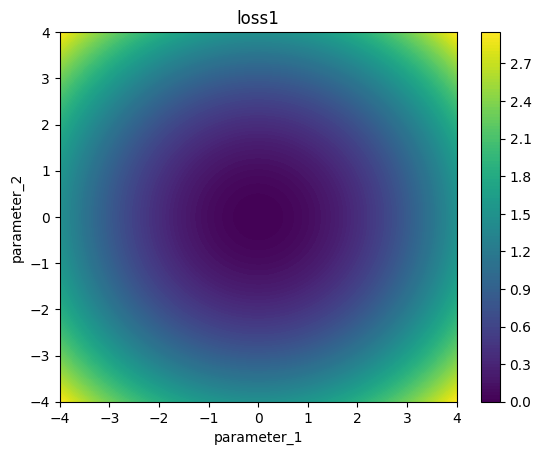

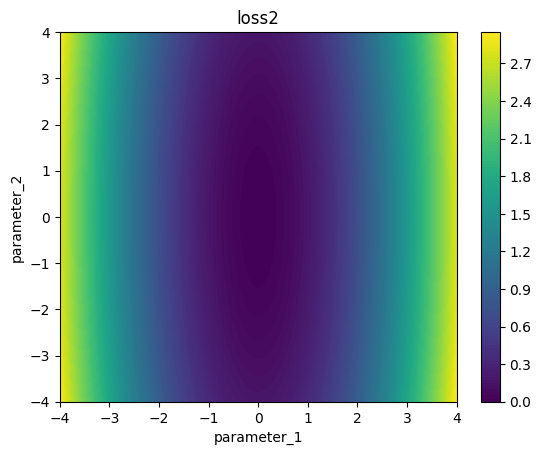

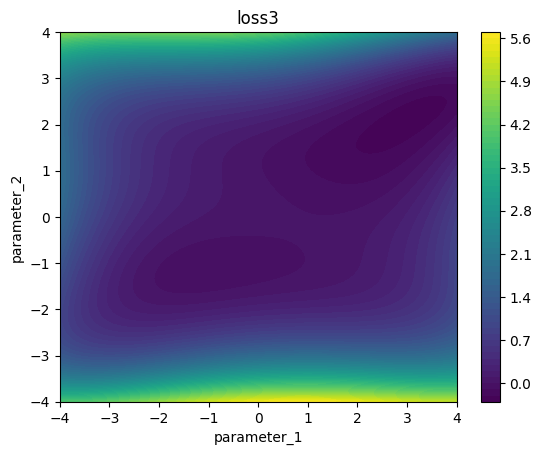

In [168]:
plot_loss_surface_toy(loss1,"loss1",levels=128)
plot_loss_surface_toy(loss2,"loss2", levels=128)
plot_loss_surface_toy(loss3,"loss3", levels=64)

The first loss function has a minimum right around (0,0). The area around the minimum is circular shaped. For the second one the minimum is elliptical shaped with an x value of 0 and an y value of 4 to -4. The third loss function has 2 local minima at $(-1.0449, -1.1386) = -0.0765$ and $(3.0953, 2.1617) = -0.2512$ (values found using the optimizer). It looks like there is a saddle point between the two minima.
Since the plot generated by the `train_example` shows the progress of the x and y parameters we expect them to converge to the lowest minimum.

### Batch size

Adam: {'lr': 0.001} full-batch||loss = 0.00
Adam: {'lr': 0.001} batch-size: 10||loss = 0.00
Adam: {'lr': 0.001} batch-size: 100||loss = 0.00
Adam: {'lr': 0.001} batch-size: 1000||loss = 0.00


Text(0.5, 1.0, 'loss1')

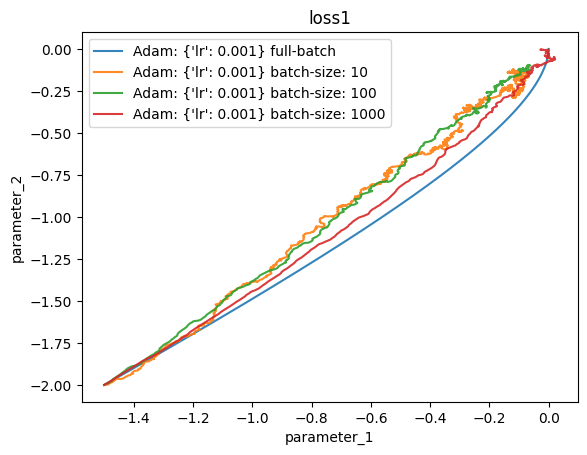

In [169]:

lr=1e-3
train_example(loss1, opt.Adam,{"lr": lr,},0,nsteps = int(55e2))
train_example(loss1, opt.Adam,{"lr": lr,},10,nsteps = int(25e3))
train_example(loss1, opt.Adam,{"lr": lr,},100,nsteps = int(85e2))
train_example(loss1, opt.Adam,{"lr": lr,},1000,nsteps = int(55e2))

plt.title("loss1")


As expected the working with the full batch yields a smooth convergenes towards the minimum. The higher the batchsize the smaller are the fluctuations, the reason for that is that the exitamtor for the Lossfunction becomes better with increasing Batchsize.
Furhtermore the fluctuations around the minimum can be observed for any batch size >0. Note that only for a Batchsize of 1000 we reach the minimum almost perfectly, while the other two start stagnate earlier, while needing much more iterations.

Adam: {'lr': 0.001} full-batch||loss = 0.00
Adam: {'lr': 0.001} batch-size: 10||loss = 0.01
Adam: {'lr': 0.001} batch-size: 100||loss = 0.00
Adam: {'lr': 0.001} batch-size: 1000||loss = 0.00


Text(0.5, 1.0, 'loss2')

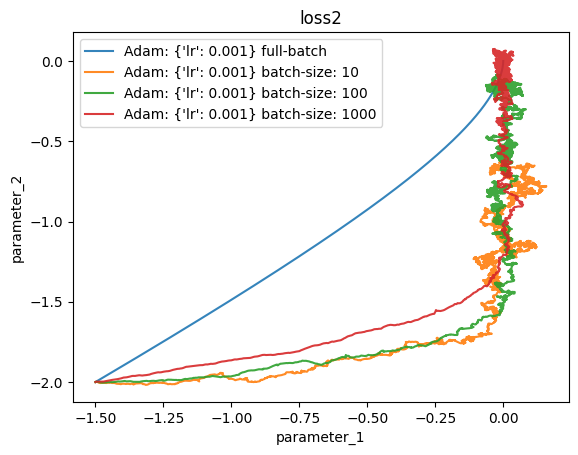

In [170]:
# Task 1.a
lr=1e-3
train_example(loss2, opt.Adam,{"lr": lr,},0,nsteps = int(55e3))
train_example(loss2, opt.Adam,{"lr": lr,},10,nsteps = int(80e3))
train_example(loss2, opt.Adam,{"lr": lr,},100,nsteps = int(85e3))
train_example(loss2, opt.Adam,{"lr": lr,},1000,nsteps = int(55e3))

plt.title("loss2")


Pretty much the same as for the first loss function. For larger Batchsizes we converge faster, with less fluctuations.

Adam: {'lr': 0.001} full-batch||loss = -0.08
Adam: {'lr': 0.001} batch-size: 10||loss = -0.08
Adam: {'lr': 0.001} batch-size: 100||loss = -0.08
Adam: {'lr': 0.001} batch-size: 1000||loss = -0.08


Text(0.5, 1.0, 'loss3')

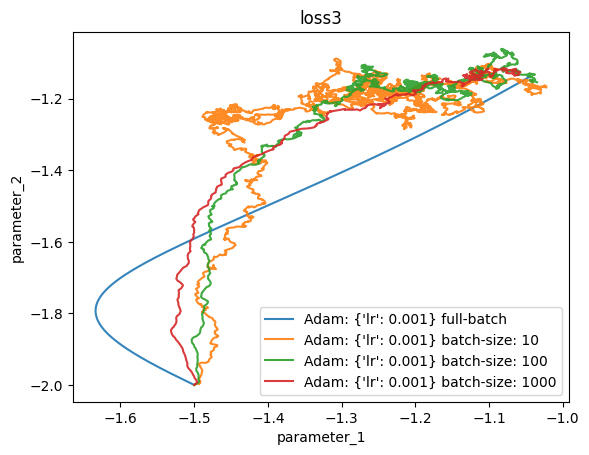

In [171]:
# Task 1.a
lr=1e-3
train_example(loss3, opt.Adam,{"lr": lr,},0,nsteps = int(10e3),)
train_example(loss3, opt.Adam,{"lr": lr,},10,nsteps = int(40e3))
train_example(loss3, opt.Adam,{"lr": lr,},100,nsteps = int(15e3))
train_example(loss3, opt.Adam,{"lr": lr,},1000,nsteps = int(5e3))

plt.title("loss3")


Suprisingly all fail to find the lower minima. While this isnt suprising for the Full Batch run, it is suprising for the batched runs, because one reason to use batches is to overcome local minima driven by the fluctuations.

### Learning rate

Adam: {'lr': 0.01} batch-size: 500||loss = 0.00
Adam: {'lr': 0.001} batch-size: 500||loss = 0.00
Adam: {'lr': 0.0001} batch-size: 500||loss = 0.00


Text(0.5, 1.0, 'loss1')

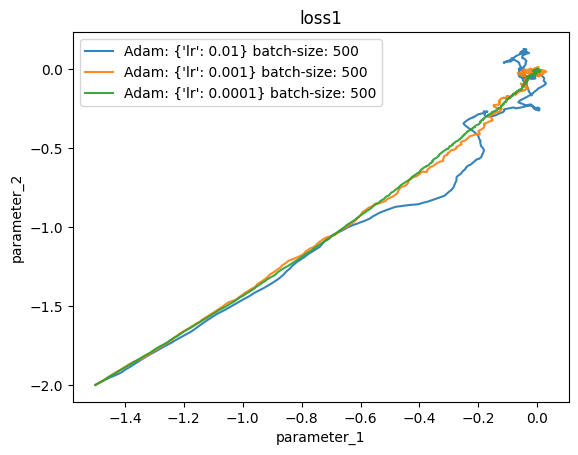

In [172]:
batchsize = 500
train_example(loss1, opt.Adam,{"lr": 1e-2,},batchsize,nsteps = int(1e3))
train_example(loss1, opt.Adam,{"lr": 1e-3,},batchsize,nsteps = int(1e4))
train_example(loss1, opt.Adam,{"lr": 1e-4,},batchsize,nsteps = int(1e5))

plt.title("loss1")

In all cases the minimum is found.  for smaller learning rates the number of steps has to be increased equally. Since the learning rate is the central hyperparamter to control overshooting, the strong fluctuations for $10^{-2}$ are expected.

Adam: {'lr': 0.01} batch-size: 500||loss = 0.01
Adam: {'lr': 0.001} batch-size: 500||loss = 0.01
Adam: {'lr': 0.0001} batch-size: 500||loss = 0.01


Text(0.5, 1.0, 'loss2')

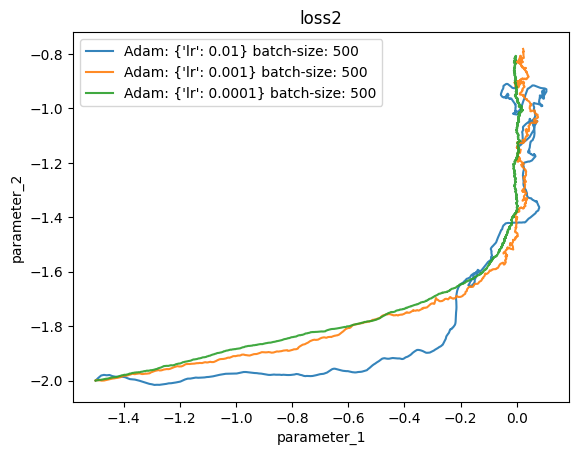

In [173]:
batchsize = 500
train_example(loss2, opt.Adam,{"lr": 1e-2,},batchsize,nsteps = int(1e3))
train_example(loss2, opt.Adam,{"lr": 1e-3,},batchsize,nsteps = int(1e4))
train_example(loss2, opt.Adam,{"lr": 1e-4,},batchsize,nsteps = int(1e5))

plt.title("loss2")

see cell above

Adam: {'lr': 0.01} batch-size: 500||loss = -0.08
Adam: {'lr': 0.001} batch-size: 500||loss = -0.08
Adam: {'lr': 0.0001} batch-size: 500||loss = -0.08


Text(0.5, 1.0, 'loss3')

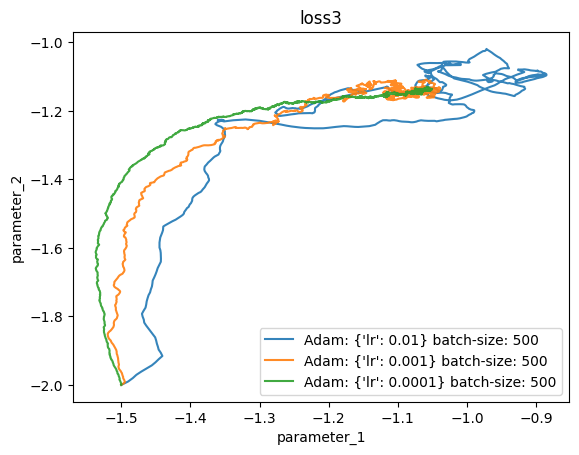

In [174]:
batchsize = 500
train_example(loss3, opt.Adam,{"lr": 1e-2,},batchsize,nsteps = int(1e3))
train_example(loss3, opt.Adam,{"lr": 1e-3,},batchsize,nsteps = int(1e4))
train_example(loss3, opt.Adam,{"lr": 1e-4,},batchsize,nsteps = int(1e5))

plt.title("loss3")

see cell above. The optimizer fails again to find the lower minimum.

### Optimizers

We choosed the ADAM and the SDG optimizers

Adam: {'lr': 0.001} batch-size: 500||loss = 0.00
SGD: {'lr': 0.001} batch-size: 500||loss = 0.00


Text(0.5, 1.0, 'loss1')

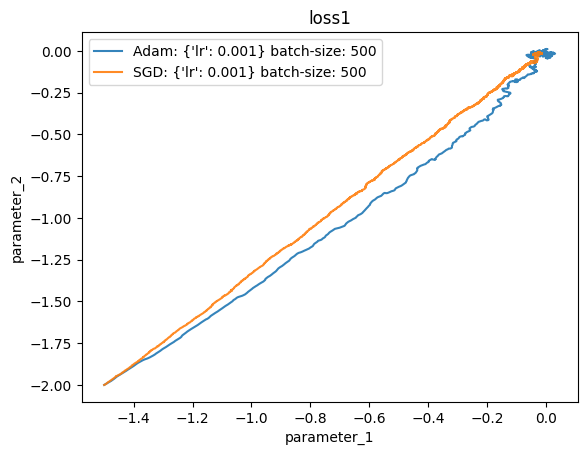

In [175]:
batchsize = 500
lr =1e-3
train_example(loss1, opt.Adam,{"lr": lr,},batchsize,nsteps = int(1e4))
train_example(loss1, opt.SGD,{"lr": lr,},batchsize,nsteps = int(3e4))


plt.title("loss1")

Both optimizers find the minium but the ADAM optimizer needs far less steps to reach it.

Adam: {'lr': 0.001} batch-size: 500||loss = 0.00
SGD: {'lr': 0.001} batch-size: 500||loss = 0.00


Text(0.5, 1.0, 'loss2')

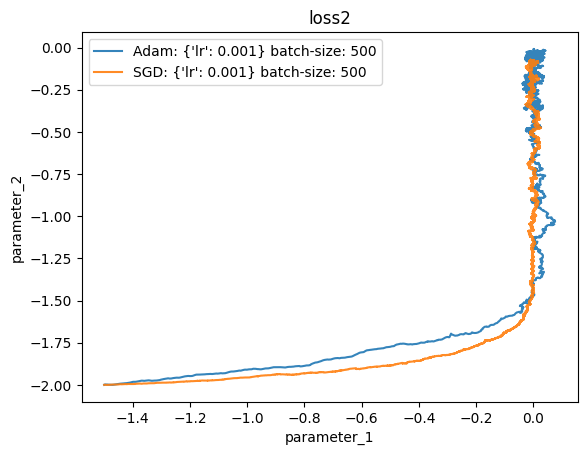

In [176]:
batchsize = 500
lr =1e-3
train_example(loss2, opt.Adam,{"lr": lr,},batchsize,nsteps = int(5e4))
train_example(loss2, opt.SGD,{"lr": lr,},batchsize,nsteps = int(15e4))


plt.title("loss2")

As seen before the Adam optimizer is about 3 times faster as the SGD.

Adam: {'lr': 0.001} batch-size: 500||loss = -0.08
SGD: {'lr': 0.001} batch-size: 500||loss = -0.08


Text(0.5, 1.0, 'loss3')

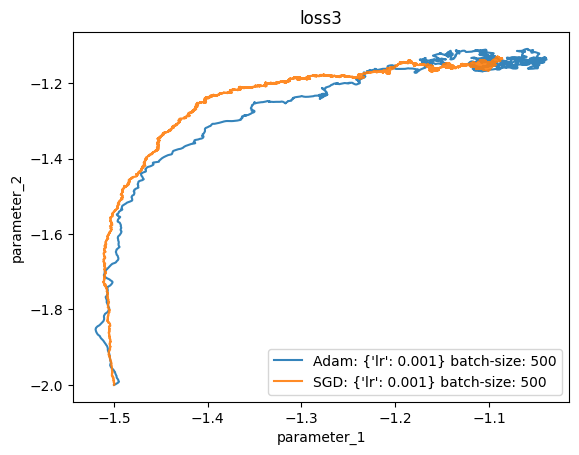

In [177]:
batchsize = 500
lr =1e-3
train_example(loss3, opt.Adam,{"lr": lr,},batchsize,nsteps = int(1e4))
train_example(loss3, opt.SGD,{"lr": lr,},batchsize,nsteps = int(3.2e4))


plt.title("loss3")

## Excercise 2 (Programming) (45/100)

### Regularization

This excercise will let you apply some of the concepts discussed in the lecture and in the theory part above. First and foremost, you will need to install `sklearn` as a new package in your environment.
To do this, make sure to be in the folder where your virtual environment is and do

```bash
$ source venv-name/bin/pip3 install sklearn
```

if this has worked correctly, you can reload the kernel of the jupyter notebook and you should be able to run

```python
import sklearn
```

Should this command run without any problem (try it out in a separate python cell) you can proceed with the task!

The following code extracts the [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2&ref=hackernoon.com) such that is already partitioned into training and test data. The data is normalized such that each dimension has mean 0 and variance 1.

In [178]:
import numpy, numpy.random

import sklearn,sklearn.datasets

def cancer_data():
    
    D = sklearn.datasets.load_breast_cancer()
    X = D['data']
    T = D['target']

    # Partition the data
    N = len(X)
    perm = numpy.random.mtrand.RandomState(1).permutation(N)
    Xtrain,Xtest = X[perm[:N//2]],X[perm[N//2:]]
    Ttrain,Ttest = T[perm[:N//2]],T[perm[N//2:]]
    print(len(Xtrain), len(Ttrain))
    # Normalize input data
    m,s = Xtrain.mean(axis=0),Xtrain.std(axis=0)+1e-9
    for x in Xtrain,Xtest: 
        x -= m; x /= s

    # Normalize targets
    m,s = Ttrain.mean(),Ttrain.std()+1e-9
    for t in Ttrain,Ttest: 
        t=t.astype(float)
        t -= m; t /= s

    return Xtrain,Ttrain,Xtest,Ttest


Xtrain,Ttrain,Xtest,Ttest = cancer_data()

nx = Xtrain.shape[1]
nh = 100

284 284


The following code implements a class `NeuralNetworkRegressor`. This is a neural network with a single hidden layer of width `nh` and a `ReLU` activation function. 
The function `reg` is a regularizer which we set initially to zero (i.e. no regularizer). 
Because the dataset is small, the network is optimized in batch mode, using the Adam optimizer. 

> Note: The `Adam` otpimizer is an efficient optimizer widely used in Machine Learning. You'll learn more about it in the next lecture and you'll be using it in the next excercise as the default optimizer of the given `fit` function. If you want to know more about Adam and momentum based optimizer you can check [this link](https://medium.com/@vinodhb95/momentum-optimizer-6023aa445e18)

In [179]:
import numpy,torch,sklearn,sklearn.metrics
from torch import nn,optim
import numpy as np
class NeuralNetworkRegressor:

    def __init__(self):
        
        torch.manual_seed(0)
        
        self.model = nn.Sequential(nn.Linear(nx,nh),nn.ReLU())
        self.pool  = lambda y: 0.1*(y[:,:nh//2].sum(dim=1)-y[:,nh//2:].sum(dim=1))
        self.loss  = nn.MSELoss()

    def reg(self): 
        return 0
        
    def fit(self,X,T,nbit=10000):
        
        X = torch.Tensor(X)
        T = torch.Tensor(T)

        optimizer = optim.Adam(self.model.parameters(),lr=0.01)
        for _ in range(nbit):
            optimizer.zero_grad()
            (self.loss(self.pool(self.model(X)),T)+self.reg()).backward()
            optimizer.step()
                
    def predict(self,X):
        return self.pool(self.model(torch.Tensor(X)))

    def score(self,X,T):
        return sklearn.metrics.r2_score(T,numpy.array(self.predict(X).data)) 

> N.B. The `score` function above implements the [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$ score). It determines how well a model predicts an outcome and it is bounded by 1 (e.g. perfect predictor). It is unbounded from elow as a model can, in general, be arbitrarily bad. 

#### **Task (2.a)** **(5 pts.)**
 Try to instantiate a neural network from the class above and train it. Then test its performance on test data. What do you conclude?

In [180]:
model = NeuralNetworkRegressor()
model.fit(Xtrain,Ttrain)
model.score(Xtest,Ttest)


0.7977557081841855

Juding from the Coefficient of determination the model predicts the model not really well but also not to bad.

#### **Task (2.b)** **(25 pts.)** 

We want to use regularization towards improving the neural network model. We consider the following two quantities:
- $\|W\|_\text{Frob} =  \sqrt{\sum_{i=1}^d \sum_{j=1}^h  w_{ij}^2}$
- $\text{Grad} = \textstyle \frac1N \sum_{n=1}^N\|\nabla_{\boldsymbol{x}}f (\boldsymbol{x_n})\|$

Here $d$ is the number of input features, $h$ is the number of neurons in the hidden layer, and $W$ is the matrix of weights in the first layer.       
> Note: in PyTorch, the matrix of weights is given in transposed form. 

In order for the model to generalize well, the last quantity ($\text{Grad}$) should be prevented from becoming too large. We rely instead on the inequality $\text{Grad}\leq \|W\|_\text{Frob}$​, that we can prove for this model, and will try to control the weight norms instead. 

- **Task (2.b.1)** **(10 pts.)** Implement the function `Frob(nn)` that computes $\|W\|_\text{Frob}$​, i.e., the Froebinius norm of the model weights.
- **Task (2.b.1)** **(10 pts.)** Implement the function `Grad(nn,X)`. This takes as input the neural network and some dataset, and returns the averaged gradient norm ($\text{Grad}$)
- **Task (2.b.c)** **(5 pts.)** Run the cell below. Can you describe what you observe and why? Please refer to excercise 2 from the theory part.

We assume that the function f is defined, as in the theory exercise of the neural network.

In [181]:
def Frob(nn):
    return torch.norm(nn.model[0].weight,'fro')


# gradient of the ReLU function
def Boolgrad(x,weight,bias):
    return ((weight@x +bias)>0)+0
    
def Grad(nn,X):
    weight = nn.model[0].weight.detach().numpy().T
    bias = nn.model[0].bias.detach().numpy()
    grads = np.zeros(X.shape[0])
    for i,x in enumerate(X):
        tonorm = numpy.zeros_like(weight[:,1])
        for j in range(0,weight.shape[1]):
            temp = (weight[:,j]*Boolgrad(x,weight[:,j],bias[j]))
            tonorm += temp
        grads[i] = np.linalg.norm(tonorm)
    
    return np.mean(grads)


In [182]:
# The following code measures these three quantities before and after training the model
# N.B. No regularization enforced here. 
def logging(name,nn):
    score_test = nn.score(Xtest,Ttest)
    score_train = nn.score(Xtrain,Ttrain)
    return rf"{name}: $R^2_{{train}}$: {score_train} | $R^2_{{test}}$: {score_test}"
def full_logging(name,nn):
    return logging(name,nn) + ' | WFrob: %7.3f | Grad: %7.3f'%(Frob(nn),Grad(nn,Xtest))

nnr = NeuralNetworkRegressor()
print(nnr.model[0].weight.shape)
print(full_logging('Before',nnr))
nnr.fit(Xtrain,Ttrain)
print(full_logging('After',nnr)) 

torch.Size([100, 30])
Before: $R^2_{train}$: -2.242276695137161 | $R^2_{test}$: -2.335018889031819 | WFrob:   5.751 | Grad:   5.654
After: $R^2_{train}$: 0.999999650230075 | $R^2_{test}$: 0.7977557081841855 | WFrob:   9.472 | Grad:  12.868


Note that we ommit a factor of $\sqrt{h} = 10$, on the Frobeniusnorm side. Taking that into account, the inequality hold, before and after the fitting. The fitting results in changed weights. Without any regressor we allow arbitrary changes of the weights. In this specific case, the Forbenius norm gets higher, which allows for higher averaged gradient norms. This is Harmful when generalizing the NN effectively. The use of a regressor is therefore needed, because it reduces the upper bound of the averaged gradient norm.

#### **Task (2.c)** **(15 pts.)** 

Consider a new objective $\mathcal{L}_{Frob}(θ)=MSE(θ)+\lambda⋅\|W\|_\text{Frob}^2$​. The first term is the original mean square error objective (see above) and  the second term is the regularization term. We hardcode the penalty coeffecient to $\lambda=0.01$. A downside of the Frobenius norm is that it is not a very tight upper bound of the gradient, that is, penalizing it is does not penalize specifically high gradient. Instead, other useful properties of the model could be negatively affected by it.


- **Task 2.c.1** **(10 pts.)**

    Create a new regressor by reimplementing the regularization function with the Frobenius norm regularizer. You may for this task call the norm functions implemented in the question above, but this time you also need to ensure that these functions can be differentiated with respect to the weight parameters (i.e., make sure that gradients can be backpropagated through the model).

- **Task 2.c.2** **(5 pts.)**       

    What do you observe? What if you change the value of $\lambda$? What can you conclude in general and how the new regressor performs compared to the old one?

In [183]:
class FrobRegressor(NeuralNetworkRegressor):
    
    def reg(self):
        return 0.01*Frob(self)**2

In [184]:
nnfrob = FrobRegressor()
nnfrob.fit(Xtrain,Ttrain)

print(full_logging('NN',nnr))
print(full_logging('NN+Frob',nnfrob))

NN: $R^2_{train}$: 0.999999650230075 | $R^2_{test}$: 0.7977557081841855 | WFrob:   9.472 | Grad:  12.868
NN+Frob: $R^2_{train}$: 0.9156387522840184 | $R^2_{test}$: 0.8971004054695444 | WFrob:   0.934 | Grad:   3.270


For $\lambda=0.01$:
``` 
NN: $R^2_{train}$: 0.999999650230075 | $R^2_{test}$: 0.7977557081841855 | WFrob:   9.472 | Grad:  12.868
NN+Frob: $R^2_{train}$: 0.9156387522840184 | $R^2_{test}$: 0.8971004054695444 | WFrob:   0.934 | Grad:   3.270
```
For $\lambda=0.0001$:
``` 
NN: $R^2_{train}$: 0.999999650230075 | $R^2_{test}$: 0.7977557081841855 | WFrob:   9.472 | Grad:  12.868
NN+Frob: $R^2_{train}$: 0.9954640517809692 | $R^2_{test}$: 0.8402218257808959 | WFrob:   4.953 | Grad:   8.218
```
For $\lambda=0.5$:
```
NN: $R^2_{train}$: 0.999999650230075 | $R^2_{test}$: 0.7977557081841855 | WFrob:   9.472 | Grad:  12.868
NN+Frob: $R^2_{train}$: 0.7490601122240516 | $R^2_{test}$: 0.8113051448671639 | WFrob:   0.194 | Grad:   1.035
```

In all three cases, $R^2$ score for the test set is boosted, in exchange for a lower $R^2$ score when using the training set. Changing the value of $\lambda$ determines the penalty effect of the regressor. When chosen to high, the averaged gradient norm is much lower than before, but the $R^2$ score is nearly the same as without any. On the other hand, choosing it to low, results in an improved $R^2$ score and a high averaged gradient norm, which isn't ideal either. It seams like $\lambda=0.01$ is a good tradeoff between high $R^2$ score and low averaged gradient norm.
